In [1]:
from mtcnn import MTCNN
import cv2
import os 
import matplotlib.pyplot as plt

def imshow(tit, image) :
    plt.title(tit)    
    if image.shape[-1] == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

Using TensorFlow backend.


# 전체적으로 살펴보기

In [21]:
def face_detection(img):
    
    img_copy = img.copy()
    
    detector = MTCNN()
    results = detector.detect_faces(img)
    
    if results is not None:
        for result in results:
            faces = result['box']
            # x, y, width, height
            x, y, w, h = faces
            
            # drwa box in img
            cv2.rectangle(img_copy, (x, y), (x + w, y + h), (100, 0, 100), 3)

            left_eye = result['keypoints']['left_eye']
            right_eye = result['keypoints']['right_eye']
            nose = result['keypoints']['nose']
            mouth_left = result['keypoints']['mouth_left']
            mouth_right = result['keypoints']['mouth_right']
            circle = [left_eye, right_eye, nose, mouth_left, mouth_right]

            for center in circle:
                cv2.circle(img_copy, center, 2, (100, 0, 100), -1)
                
            imshow('draw',img_copy)
            
            # crop img
            img_crop = img[y:y+h, x:x+w]
            imshow('crop', img_crop)
            
            # make square
            left = x
            top = y
            right = x + w
            bottom = y + h
            x_center= left + int(w/2)
            left = x_center - int(h/2)
            right = x_center + int( h/2)
            img_square = img[top:bottom, left:right]
            img_112 = cv2.resize(img_square, dsize=(112,112), interpolation = cv2.INTER_AREA)
            imshow('square', img_112)  
                 
        
    else:
        print('Face not Found')

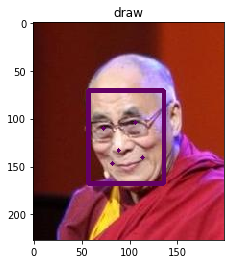

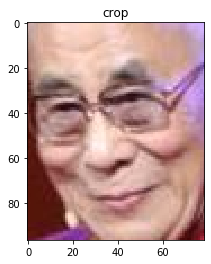

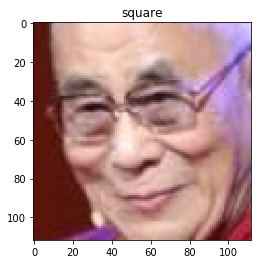

In [22]:
file_path = '../data/small_vgg/train/n000001/0001_01.jpg'
img = cv2.imread(file_path)
face_detection(img)

# 얼굴이 여러개일 때 정면 얼굴만 찾도록 하기

### bounding box와 눈코입 있는 이미지만 보이게하기
- mctnn이 알아서 안보이는 쪽 눈, 입을 유추해냄

In [42]:
def face_detection(img):
    
    img_copy = img.copy()
    
    detector = MTCNN()
    results = detector.detect_faces(img)
    
    if results is not None:
        print('len(results)', len(results))
        
        if len(results)== 1:
            faces = results[0]['box']
            # x, y, width, height
            x, y, w, h = faces
            left = x
            top = y
            right = x + w
            bottom = y + h
            x_center= left + int(w/2)
            left = x_center - int(h/2)
            right = x_center + int( h/2)
            img_square = img[top:bottom, left:right]
            img_112 = cv2.resize(img_square, dsize=(112,112), interpolation = cv2.INTER_AREA)
            imshow('square', img_112)  
        
        else:
            for i, result in enumerate(results):
                print(i)
                
                faces = result['box']
                x, y, w, h = faces

                left_eye = result['keypoints']['left_eye']
                right_eye = result['keypoints']['right_eye']
                nose = result['keypoints']['nose']
                mouth_left = result['keypoints']['mouth_left']
                mouth_right = result['keypoints']['mouth_right']
                print(left_eye, right_eye, nose, mouth_left, mouth_right)
                circle = [left_eye, right_eye, nose, mouth_left, mouth_right]

                for center in circle:
                    cv2.circle(img_copy, center, 10,(100, 0, 100), -1)

                imshow('draw',img_copy)


                le = not left_eye is None
                print('le', le)
                re = not right_eye is None
                no = not nose is None
                ml = not mouth_left is None
                mr = not mouth_right is None

                if le and re and no and ml and mr:
                    left = x
                    top = y
                    right = x + w
                    bottom = y + h
                    x_center= left + int(w/2)
                    left = x_center - int(h/2)
                    right = x_center + int( h/2)
                    img_square = img[top:bottom, left:right]
                    img_112 = cv2.resize(img_square, dsize=(112,112), interpolation = cv2.INTER_AREA)
                    imshow('square', img_112)  
                    
    else:
        print('Face not Found')

len(results) 2
0
(93, 118) (134, 119) (94, 141) (87, 173) (119, 176)


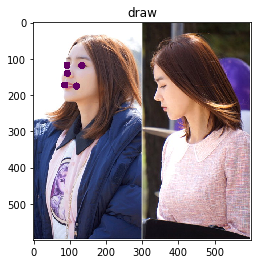

le True


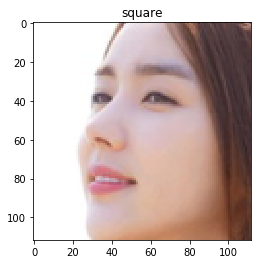

1
(336, 186) (365, 175) (334, 213) (353, 245) (375, 238)


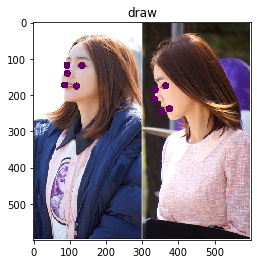

le True


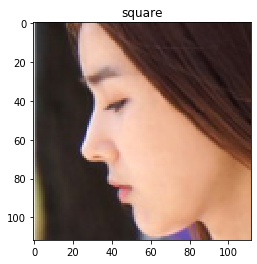

In [43]:
file_path = '../data/mtcnn_test2.jpg'
img = cv2.imread(file_path)
face_detection(img)

len(results) 1


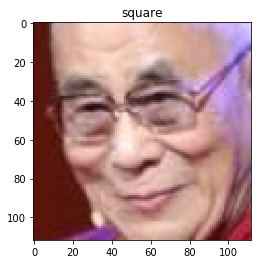

In [38]:
file_path = '../data/small_vgg/train/n000001/0001_01.jpg'
img = cv2.imread(file_path)
face_detection(img)

len(results) 1


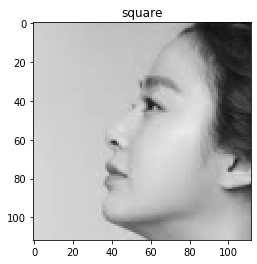

In [30]:
file_path = '../data/mtcnn_test.jpg'
img = cv2.imread(file_path)
face_detection(img)

### 면적이 작은 이미지는 pass`

In [89]:
def face_detection(img):
    
    img_height, img_width = img.shape[:2]
#     print(img_height, img_width)
    detector = MTCNN()
    results = detector.detect_faces(img)
    
    if len(results) >= 1:
#         print('len(results)', len(results))
        
        if len(results)== 1:
            faces = results[0]['box']
            # x, y, width, height
            x, y, w, h = faces
#             print(x, y, w, h)
            
            
            left = x if x >0 else 0
            top = y if y>0 else 0
            right = x + w
            bottom = y + h
            x_center= left + int(w/2)
            left = max(0, x_center - int(h/2))
            right = min( x_center + int( h/2), img_width)
#             print(left, right, top, bottom)
            img_square = img[top:bottom, left:right]
#             print(img_square.shape)
            img_112 = cv2.resize(img_square, dsize=(112,112), interpolation = cv2.INTER_AREA)
#             imshow('square', img_112) 
            return True, img_112      
            
        
        else:
            face_area = []
            for i, result in enumerate(results):
                faces = result['box']
                x, y, w, h = faces
                face_area.append((i, w*h))
            
            print(face_area)
            area_sorted = sorted(face_area, key = lambda x: x[1], reverse=True)
            print(area_sorted)
            
            
            max_index = area_sorted[0][0]
#             print(max_index)
            max_faces = results[max_index]['box']
            x, y, w, h = max_faces
#             print(x, y, w, h)
            
            left = x
            top = y
            right = x + w
            bottom = y + h
            x_center= left + int(w/2)
            left = max(0, x_center - int(h/2))
            right = min( x_center + int( h/2), img_width)
#             print(left, right, top, bottom)
            img_square = img[top:bottom, left:right]
#             print(img_square.shape)
            img_112 = cv2.resize(img_square, dsize=(112,112), interpolation = cv2.INTER_AREA)
#             imshow('square', img_112) 
            return True, img_112             
    else:
        return False, None


485 667
len(results) 1
216 -35 371 447
178 624 0 412
(412, 446, 3)


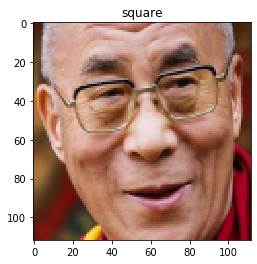

(True,
 array([[[  9,  23,  71],
         [ 10,  23,  73],
         [ 10,  24,  75],
         ...,
         [ 15,  42,  76],
         [ 16,  43,  77],
         [ 16,  43,  76]],
 
        [[ 10,  24,  73],
         [ 11,  25,  73],
         [ 11,  26,  74],
         ...,
         [ 14,  41,  75],
         [ 16,  43,  77],
         [ 16,  43,  76]],
 
        [[ 11,  25,  74],
         [ 12,  27,  73],
         [ 14,  30,  73],
         ...,
         [ 14,  41,  75],
         [ 16,  43,  77],
         [ 15,  42,  75]],
 
        ...,
 
        [[ 13,  20,  91],
         [ 13,  21,  98],
         [ 14,  22, 106],
         ...,
         [ 32,   3, 153],
         [ 10,   0,  94],
         [  2,   2,  66]],
 
        [[ 13,  22,  91],
         [ 13,  22,  97],
         [ 13,  21, 104],
         ...,
         [ 31,   2, 151],
         [ 11,   1,  96],
         [  1,   1,  67]],
 
        [[ 14,  23,  90],
         [ 13,  22,  96],
         [ 13,  22, 102],
         ...,
         [ 31,   3, 1

In [84]:
file_path = '../data/small_vgg/train/n000001/0038_01.jpg'
img = cv2.imread(file_path)
face_detection(img)

len(results) 2
[(0, 14400), (1, 16112)]
[(1, 16112), (0, 14400)]
1


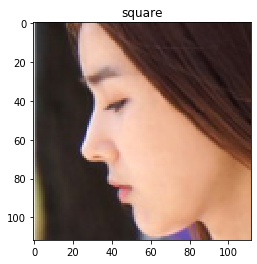

array([[[218, 217, 215],
        [ 78,  76,  75],
        [ 50,  50,  50],
        ...,
        [ 26,  26,  42],
        [ 27,  27,  43],
        [ 27,  27,  43]],

       [[218, 217, 215],
        [ 78,  77,  76],
        [ 51,  51,  51],
        ...,
        [ 24,  24,  40],
        [ 27,  27,  43],
        [ 28,  28,  44]],

       [[219, 218, 216],
        [ 80,  77,  77],
        [ 54,  52,  53],
        ...,
        [ 22,  22,  38],
        [ 27,  27,  43],
        [ 28,  28,  44]],

       ...,

       [[215, 234, 240],
        [128, 166, 182],
        [ 93, 141, 162],
        ...,
        [141, 179, 233],
        [139, 176, 231],
        [138, 175, 231]],

       [[217, 234, 240],
        [128, 164, 182],
        [ 89, 135, 158],
        ...,
        [142, 180, 234],
        [140, 178, 233],
        [138, 175, 231]],

       [[217, 233, 240],
        [125, 159, 180],
        [ 92, 136, 162],
        ...,
        [141, 179, 233],
        [140, 178, 233],
        [136, 173, 229]]

In [63]:
file_path = '../data/mtcnn_test2.jpg'
img = cv2.imread(file_path)
face_detection(img)

len(results) 4
[(0, 33654), (1, 28032), (2, 53086), (3, 16872)]
[(2, 53086), (0, 33654), (1, 28032), (3, 16872)]
2


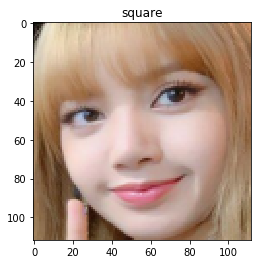

array([[[ 11,  15,  16],
        [  8,  14,  13],
        [  7,  15,  16],
        ...,
        [104, 142, 195],
        [100, 142, 199],
        [ 99, 143, 204]],

       [[ 11,  15,  16],
        [ 23,  29,  30],
        [ 31,  40,  42],
        ...,
        [ 88, 130, 179],
        [ 95, 141, 193],
        [ 99, 145, 202]],

       [[ 25,  27,  34],
        [ 32,  36,  44],
        [ 12,  20,  27],
        ...,
        [100, 137, 188],
        [ 95, 134, 189],
        [103, 142, 201]],

       ...,

       [[ 96, 131, 161],
        [ 93, 129, 159],
        [ 79, 115, 145],
        ...,
        [101, 131, 158],
        [115, 146, 173],
        [104, 137, 168]],

       [[ 94, 128, 158],
        [ 88, 124, 154],
        [ 83, 119, 149],
        ...,
        [103, 133, 160],
        [118, 148, 176],
        [111, 142, 172]],

       [[ 96, 129, 158],
        [ 91, 125, 155],
        [ 82, 116, 146],
        ...,
        [104, 134, 160],
        [119, 149, 176],
        [116, 147, 176]]

In [64]:
file_path = '../data/mtcnn_test3.jpg'
img = cv2.imread(file_path)
face_detection(img)

# 다른 폴더에 저장

In [65]:
old_dir_path = '../data/small_vgg/train'
new_dir_path = '../data/small_vgg_112x112/train'

In [66]:
old_dir_list = os.listdir(old_dir_path)
len(old_dir_list)

3

In [90]:
for i , people_name in enumerate(old_dir_list):
#     print(old_dir)
    new_people_dir = os.path.join(new_dir_path, people_name)
#     print(new_people_dir)
    try:
        os.mkdir(new_people_dir)
    except Exception as err:
        pass
        
    people_path = os.path.join(old_dir_path, people_name)
    old_file_list = os.listdir(people_path)
    not_find = 0
    find_face = 0
    for j, file in enumerate(old_file_list):
        old_file_path = os.path.join(people_path, file)
#         print('old',old_file_path)
        
        original_image = cv2.imread(old_file_path, 1)
        ret, img_112 = face_detection(original_image)
        
        if ret:
            new_file_path = f"{new_people_dir}/{file}"
#             print('new', new_file_path)
            cv2.imwrite(new_file_path, img_112)
            find_face += 1
        else:
            not_find +=1
    print(f'{people_name}-find:{find_face},not_find:{not_find}' )
            

KeyboardInterrupt: 